In [1]:
import matplotlib.pyplot as plt
#set default figure size to 15,4
plt.rcParams['figure.figsize'] = [15, 4]

In [2]:
#set pandas column width and columns count to None
import pandas as pd
pd.set_option('display.max_columns', None) # don't hide columns
pd.set_option('display.max_colwidth', 200) # don't truncate column content

In [3]:
#load tematy_i_opisy.pickle from data_acquisition-data folder
import pickle
with open('./data_acquisition-data/tematy_i_opisy_df.pickle', 'rb') as f:
    tematy_i_opisy = pickle.load(f)
tematy_i_opisy.sample(1)

,Tytuł pracy w języku oryginału,Temat Pracy,Jednostka organizacyjna,Osoba zgłaszająca temat,Kierunki studiów,Typ pracy,Status tematu,Data aktualizacji,url
4759,"Koncepcja, projekt i właściwości innowacyjnego glinokrzemianowego betonu ogniotrwałego.","Koncepcja, projekt i właściwości innowacyjnego glinokrzemianowego betonu ogniotrwałego.",[160-000] Wydział Inżynierii Materiałowej i Ceramiki,Dominika Madej,Technologia Chemiczna,inżynierska,Zarezerwowany,31 marca 2022,https://apd.usos.agh.edu.pl/topics/show/3198/


In [4]:
# this was to check if '\n' is literally in the data, or if the new line character is displayed like that in pandas Dataframe
# indexes=[1135,4876,3232]
# print(tematy_i_opisy.loc[indexes])
# turns out there is no '\' then 'n' in the data 

Do some boring stuff here, like show unique values for "Typ pracy" "Status tematu", do histograms for them with "Jednostka organizacyjna" as well.

In [5]:
#show nan values
tematy_i_opisy.isna().sum()

Tytuł pracy w języku oryginału    0
Temat Pracy                       0
Jednostka organizacyjna           0
Osoba zgłaszająca temat           0
Kierunki studiów                  0
Typ pracy                         0
Status tematu                     0
Data aktualizacji                 0
url                               0
dtype: int64

In [6]:
def hist_first_bar_different_color(data, dims=(15,4), bins=10, color='red'):
    fig, ax = plt.subplots()
    fig.set_size_inches(dims)
    n,bins,patches =ax.hist(data, bins=bins)
    patches[0].set_facecolor(color)
    plt.show()

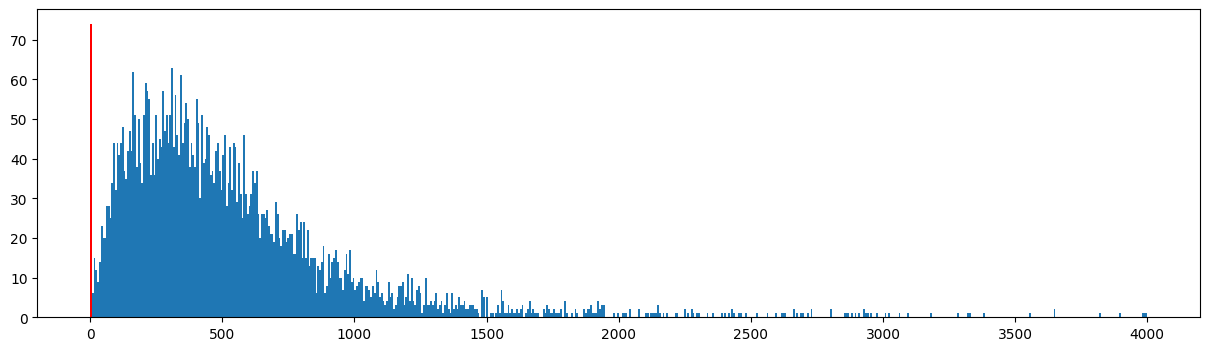

In [7]:
# count Temat Pracy string lenght and make barplot
import matplotlib.pyplot as plt
hist_first_bar_different_color(tematy_i_opisy['Temat Pracy'].str.len(), bins=600, color='red')

In [8]:
opis_lenght_to_count = {}
for x in range(0,10):
    opis_lenght_to_count[x] = len(tematy_i_opisy[tematy_i_opisy["Temat Pracy"].str.len()==x])
print(opis_lenght_to_count)

{0: 9, 1: 56, 2: 0, 3: 6, 4: 0, 5: 2, 6: 1, 7: 1, 8: 0, 9: 0}


In [9]:
tematy_i_opisy[tematy_i_opisy['Temat Pracy'].str.len() == 23].sample(1)

,Tytuł pracy w języku oryginału,Temat Pracy,Jednostka organizacyjna,Osoba zgłaszająca temat,Kierunki studiów,Typ pracy,Status tematu,Data aktualizacji,url
3297,Opis i analiza numeryczna powstawania i stosowania efektu Magnusa,"Piotr Michalak, 130-306",[130-000] Wydział Inżynierii Mechanicznej i Robotyki,Krzysztof Pytel,"inżynieria mechaniczna,\ninżynieria mechaniczna,\ninżynieria mechaniczna,\ninżynieria mechaniczna,\nInżynieria Mechaniczna i Materiałowa,\nInżynieria Mechatroniczna,\nMechanika i Budowa Maszyn,\nM...","inżynierska,\nmagisterska",Dostępny,18 stycznia 2023,https://apd.usos.agh.edu.pl/topics/show/7403/


In [10]:
#print sample of Temat Pracy where lenght is 5 and when lenght is 200
print(tematy_i_opisy[tematy_i_opisy['Temat Pracy'].str.len() == 5].sample(1)['Temat Pracy'].values[0])
print(tematy_i_opisy[tematy_i_opisy['Temat Pracy'].str.len() == 170].sample(1)['Temat Pracy'].values[0])

.....
Praca ma charakter eksperymentalny. Będzie polegała na wyżarzaniu probek przewalcowanego aluminium i ocenie stopnia rekrystalizacji (pomiary twardości/mikroskop optyczny)


In [11]:
def get_rows_with_column_lenght_in_range(data,column,range_start,range_end):
    return data[(data[column].str.len()>=range_start) & (data[column].str.len()<range_end)]

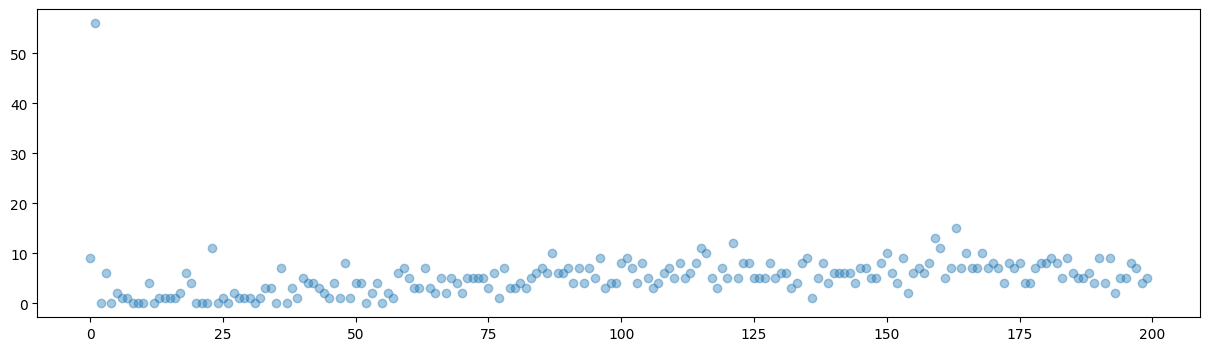

In [12]:
# lenghts = [len(tematy_i_opisy[tematy_i_opisy['Temat Pracy'].str.len() == x]) for x in range(0,200)]
lenghts = [len(get_rows_with_column_lenght_in_range(tematy_i_opisy,'Temat Pracy',x,x+1)) for x in range(0,200)]
plt.plot(lenghts, 'o',alpha=0.4)

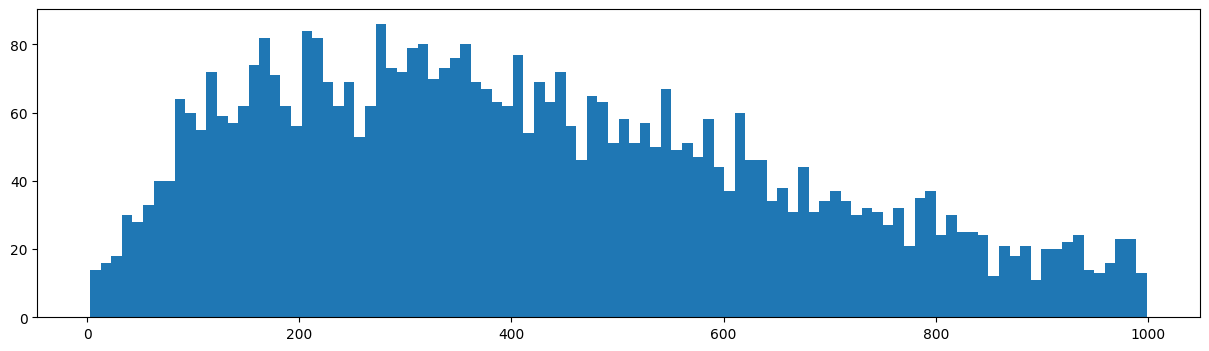

In [13]:
# plt.hist(tematy_i_opisy[tematy_i_opisy['Temat Pracy'].str.len() > 2][tematy_i_opisy['Temat Pracy'].str.len() < 1000]['Temat Pracy'].str.len(), bins=100)
plt.hist(get_rows_with_column_lenght_in_range(tematy_i_opisy,'Temat Pracy',2,1000)['Temat Pracy'].str.len(), bins=100)
plt.show()

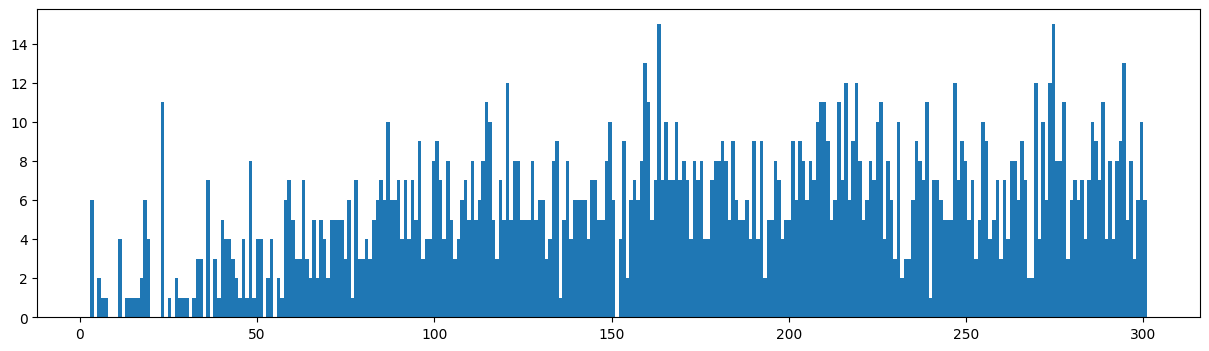

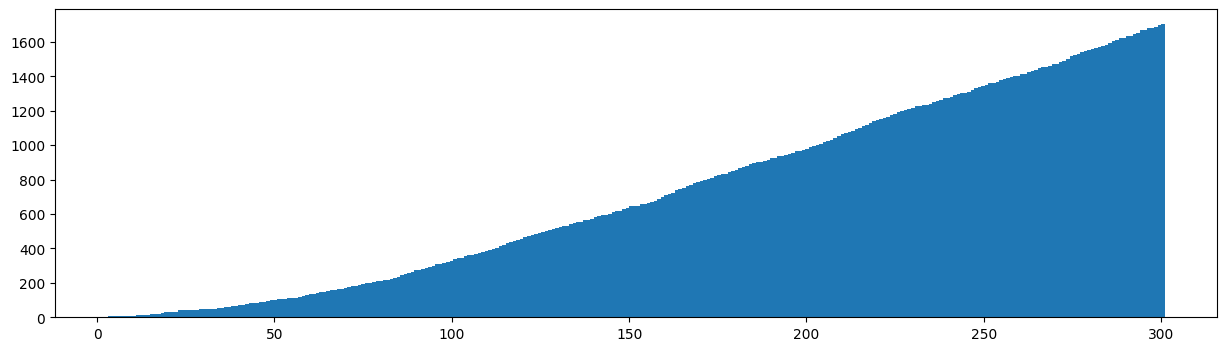

In [14]:
plt.hist(get_rows_with_column_lenght_in_range(tematy_i_opisy,'Temat Pracy',2,302)['Temat Pracy'].str.len(), bins=300)
plt.show()
plt.hist(get_rows_with_column_lenght_in_range(tematy_i_opisy,'Temat Pracy',2,302)['Temat Pracy'].str.len(), bins=300, cumulative=True)
plt.show()

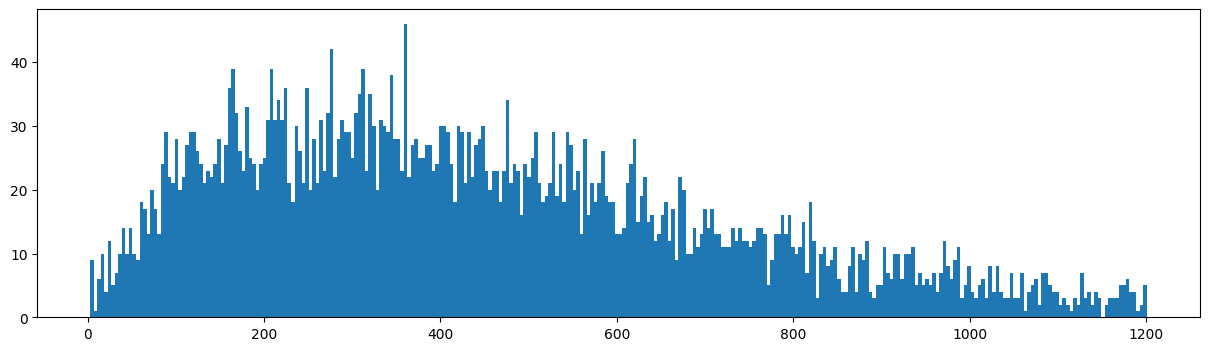

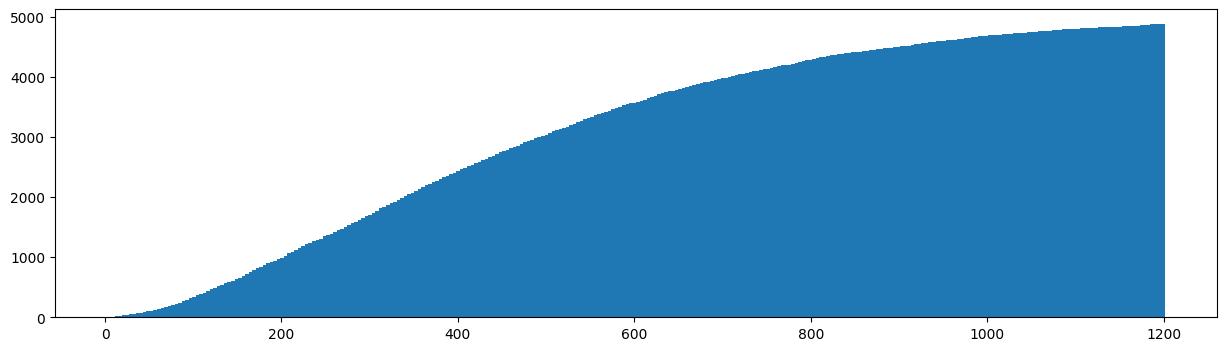

In [15]:
plt.hist(get_rows_with_column_lenght_in_range(tematy_i_opisy,'Temat Pracy',2,1202)['Temat Pracy'].str.len(), bins=300)
plt.show()
plt.hist(get_rows_with_column_lenght_in_range(tematy_i_opisy,'Temat Pracy',2,1202)['Temat Pracy'].str.len(), bins=300, cumulative=True)
plt.show()

In [16]:
def get_unique_values_of_column_with_lenght_in_range(data,column,range_start,range_end):
    unique_values = [] 
    for x in range(range_start,range_end+1):
        unique_values.append(data[data[column].str.len()==x][column].unique())  
    return unique_values
def printArrayOfArrays(arrayOfArrays):#print data
    for x in arrayOfArrays:
        print(x)
def print_unique_values_of_column_with_lenght_in_range(data,column,range_start,range_end):
    printArrayOfArrays(get_unique_values_of_column_with_lenght_in_range(data,column,range_start,range_end))

In [17]:
print_unique_values_of_column_with_lenght_in_range(tematy_i_opisy,'Temat Pracy',0,80)

['']
['.' '*' '-']
[]
['...' 'foo' 'ZZL' 'ggg']
[]
['.....' 'xxxxx']
['xsasdf']
['W pracy']
[]
[]
[]
['placeholder' 'Placeholder' 'SASASASASAS']
[]
['Jak w temacie']
['Praca badawcza']
['Projekt systemu']
['opis po Świętach']
['praca licencjacka' 'Praca aplikacyjna']
['Praca indywidualna']
['cELEM PRACY JEST...' 'Praca dotyczy .....' 'Praca indywidualna.']
[]
[]
[]
['Piotr Michalak, 130-306' 'dla wybranego materiału']
[]
['Praca projektowo-badawcza']
[]
['dr inż. Izabela Kalemba-Rec' 'Badawcza, studium przypadku']
['badawczy projekt inzynierski']
['Studium przypadku lub projekt']
['Praca projektowa indywidualna.']
[]
['Badawcza/ projektowa magisterska']
['Recenzent dr inż. Marcin Kwiecień' 'Praca badawcza, studium przypadku'
 'praca badawcza, studium przypadku']
['Recenzent: Madejski Paweł, 130-306' 'Recenzent: Marek Sibielak, 130-301']
[]
['Recenzent: dr hab. inż. Sławomir Kąc'
 'Recenzent: Jarosław Smoczek, 130-307'
 'recenzent: Smoczek Jarosław, 130-307'
 'praca badawcza lub studium

Turns out the delimiter is rather simple. Just cut too short topics plus cut the one that have "recenzent" in it

In [18]:
print_unique_values_of_column_with_lenght_in_range(tematy_i_opisy,'Temat Pracy',0,37)

['']
['.' '*' '-']
[]
['...' 'foo' 'ZZL' 'ggg']
[]
['.....' 'xxxxx']
['xsasdf']
['W pracy']
[]
[]
[]
['placeholder' 'Placeholder' 'SASASASASAS']
[]
['Jak w temacie']
['Praca badawcza']
['Projekt systemu']
['opis po Świętach']
['praca licencjacka' 'Praca aplikacyjna']
['Praca indywidualna']
['cELEM PRACY JEST...' 'Praca dotyczy .....' 'Praca indywidualna.']
[]
[]
[]
['Piotr Michalak, 130-306' 'dla wybranego materiału']
[]
['Praca projektowo-badawcza']
[]
['dr inż. Izabela Kalemba-Rec' 'Badawcza, studium przypadku']
['badawczy projekt inzynierski']
['Studium przypadku lub projekt']
['Praca projektowa indywidualna.']
[]
['Badawcza/ projektowa magisterska']
['Recenzent dr inż. Marcin Kwiecień' 'Praca badawcza, studium przypadku'
 'praca badawcza, studium przypadku']
['Recenzent: Madejski Paweł, 130-306' 'Recenzent: Marek Sibielak, 130-301']
[]
['Recenzent: dr hab. inż. Sławomir Kąc'
 'Recenzent: Jarosław Smoczek, 130-307'
 'recenzent: Smoczek Jarosław, 130-307'
 'praca badawcza lub studium

Topics shorter than 37 are deffinitly to delete

In [19]:
def filter_array_of_arrays(data,filter=" ",select=True,caseSensitive=False):
    result= []
    for x in data:
        if select:
            if caseSensitive:
                result.append([y for y in x if filter in y])
            else:
                result.append([y for y in x if filter.lower() in y.lower()])
        else:
            if caseSensitive:
                result.append([y for y in x if filter not in y])
            else:
                result.append([y for y in x if filter.lower() not in y.lower()])
    return result

In [20]:
# print_unique_values_of_column_with_lenght_in_range(tematy_i_opisy,'Temat Pracy',38,50)
unq = get_unique_values_of_column_with_lenght_in_range(tematy_i_opisy,'Temat Pracy',38,50)
unqf = filter_array_of_arrays(unq,"Recenzent",False)
unqnf = filter_array_of_arrays(unq,"Recenzent",True)
printArrayOfArrays(unqf)
print("---")
printArrayOfArrays(unqnf)

['Studia przypadku wybranych organizacji', 'Studium przypadku, projekt lub badania', 'Test how language selection is working']
['Praca dotyczy zastosowania narzędzi LM.']
['Praca dotyczy wykorzystania narzędzi LM.']
['Temat dotyczący pomocy publicznej dla MSP']
['Praca ma charakter analityczno-projektowy.', 'Praca indywidualna z wykorzystaniem robota']
['ocena efektywności pracy linii produkcyjnej', 'Innowacje w procesie rekrutacji pracowników']
['Opis metod projektowania oraz ich porównania', 'Praca dotyczy analizy procesu produkcyjnego.']
[]
['Innowacje technologiczne w branży logistycznej', 'wybrane zagadnienia dotyczące działalności NGO']
[]
['Funkcjonalności współczesnych systemów klasy ERP', 'Zarządzanie ryzykiem w projekcie informatycznym.']
['Opis tego zagadnienia można znaleźć w interniecie']
['Wykorzystanie języka VBA w oprogramowaniu typu CAD', 'Wykorzystanie języka VBA w oprogramowaniu typu ERP', 'The thesis can be carried out in Polish or English', 'Jak w temacie. Dodatkow

In the next batch (38-50) it turns out it is enough if we remove all topics that have word "recenzent" in it

In [21]:
unq = get_unique_values_of_column_with_lenght_in_range(tematy_i_opisy,'Temat Pracy',50,130)
unqf = filter_array_of_arrays(unq,"Recenzent",False)
unqnf = filter_array_of_arrays(unq,"Recenzent",True)
printArrayOfArrays(unqf)
print("---")
printArrayOfArrays(unqnf)

['Wykorzystanie języka VBA w oprogramowaniu typu CAD', 'Wykorzystanie języka VBA w oprogramowaniu typu ERP', 'The thesis can be carried out in Polish or English', 'Jak w temacie. Dodatkowe informacje u prowadzącego']
['Glass decoration project using painting techniques.', 'DFT modeling of metal atomic layer deposition (ALD)']
[]
['Projekt pozycjonera liniowego do robota spawalniczego', 'fully automatic vessel lumen extraction in OCT images']
['Analiza zastosowania VR i AR w zarządzaniu magazynowym', 'Komputerowe narzędzia wspomagające procesy kontrolingu']
[]
['Praca będzie prowadzona z wykorzystaniem metody LC-MS/MS']
['Roboty przemysłowe w automatyzacji procesów produkcyjnych']
['Komputerowe wspomaganie prototypowania układu kół zębatych', 'Praca obejmuje obliczenia projektowe i model CAD sprzęgła.', 'Innowacyjne rozwiązania informatyczne w sektorze deep tech', 'Studia przypadku wybranych przedsiębiorstw lub organizacji', 'Szczegółowy cel i zakres pracy do uzgodnienia z promotorem']


Topics show up that have some real topic, but also a sentence with world Recenzent in it

In [22]:
def getSentenceWithWord(text,word,includeIndexMarkers=False,caseSensitive=False):
    
    # find word in the text
    word_case = word
    word_start = text.find(word_case) #if we have caseSensitive on, we will search for the word later

    if caseSensitive == False:
        word_case = word.lower()
        text = text.lower()
        word_start = text.find(word_case)

    # if word is not in the text return None
    if word_start == -1:
        return None
    
    # find start of the sentence, by traversing back until a '.', or new line character is found
    start = word_start
    while start > 0 and text[start] != '.' and text[start] != '\n':
        start -= 1
    # find end of the sentence, by traversing forward until a '.', or new line character is found
    end = word_start
    while end < len(text) and text[end] != '.' and text[end] != '\n':
        end += 1
    # return the sentence
    if includeIndexMarkers:
        return text[start:end], start, end
    return text[start:end]
     
def getTextWithSentenceSubtracted(text,word,caseSensitive=False):
    sentence,start,end = getSentenceWithWord(text,word,True,caseSensitive)
    if sentence == None:
        return text
    return text[:start] + text[end:]

In [23]:
#test the function that removes the sentence with the word "Recenzent" in it on unqnf
for x in unqnf:
    for y in x:
        #print both what was removed, and what is left
        print([getSentenceWithWord(y,"Recenzent",True)[0],getTextWithSentenceSubtracted(y,"Recenzent")])


['\nrecenzent: jacek cieślik, 130-007', 'Praca symulacyjna']
['propozycja recenzenta: prof', '. dr hab. inż. Jerzy Wiciak']
['\nrecenzent: damian dzienniak, 130-307', 'praca projektowa,']
['\nrecenzent: ryszard machnik, 130-307', 'Praca konstrukcyjna,']
['proponowany recenzent dr hab', '. inż Jarosław Smoczek, prof. AGH']
['\nrecenzent: tomasz góral, 130-307', 'Praca konstrukcyjno-symulacyjna']
['proponowany recenzent: dr hab', '. inż. Michalczyk Krzysztof, prof. AGH, 130-304']
['. recenzent: dr hab', 'Nawigacja i sterowanie mobilnymi robotami. inż. Paweł Paćko']
['\nrecenzent: prof', 'Praca indywidualna z nowym urządzeniem.. dr hab. inż. Tomasz Barszcz']
['. proponowany recenzent: dr hab', 'Zrobotyzowane stanowisko do paletyzacji . inż. Mariusz Giergiel']
['recenzent: dr hab', '. inż. Joanna Iwaniec, Prof. AGH\nPraca indywidualna możliwa konstrukcją urządzenia lewitującego.']
['\nrecenzent: machnik ryszard, 130-307', 'Celem pracy jest opracowanie stolika obrotowego do celów fotografii

Nie działa, bo zatrzymało się na kropkach, które są fragmentem skrutu, np: "prof."

In [24]:
abbvs=["dr.","mgr.","inż.","hab.","prof.","lic."]
def findPeriodThatIsNotAPartOfAnAbbreviationOrNewLine(text,startIndex,abbrvs=[],traverseBackwards=True):
    if traverseBackwards:
        isAbbreviation = True
        while isAbbreviation:
            #find the first period or new line character before the startIndex
            while startIndex > 0 and text[startIndex] != '.' and text[startIndex] != '\n':
                startIndex -= 1
            if startIndex == 0:
                return startIndex
            #if we stumbled uppon period, find first space before it
            startIndexSpace=startIndex
            while startIndexSpace > 0 and text[startIndexSpace] != ' ':
                startIndexSpace -= 1
            #get the word
            word = text[startIndexSpace+1:startIndex]
            #if the word is not an abbreviation, return the index
            if word not in abbrvs:
                isAbbreviation = False
                return startIndex
            startIndex -= 1
        return 0
    if not traverseBackwards:
        isAbbreviation = True
        while isAbbreviation:
            #find the first period or new line character after the startIndex
            while startIndex < len(text) and text[startIndex] != '.' and text[startIndex] != '\n':
                startIndex += 1
            if startIndex == len(text):
                return startIndex
            #if we stumbled uppon period, find first space after it
            startIndexSpace=startIndex
            while startIndexSpace > 0 and text[startIndexSpace] != ' ':
                startIndexSpace -= 1
            #get the word
            word = text[startIndexSpace+1:startIndex+1]
            #if the word is not an abbreviation, return the index
            if word not in abbrvs:
                isAbbreviation = False
                return startIndex
            startIndex += 1
        return len(text)
    return None
    
#fix getSentenceWithWord to use findPeriodThatIsNotAPartOfAnAbbreviationOrNewLine
def getSentenceWithWord(text,word,includeIndexMarkers=False,caseSensitive=False,abbrvs=[]):
    
    # find word in the text
    word_case = word
    word_start = text.find(word_case) #if we have caseSensitive on, we will search for the word later

    if caseSensitive == False:
        word_case = word.lower()
        text = text.lower()
        word_start = text.find(word_case)

    # if word is not in the text return None
    if word_start == -1:
        if includeIndexMarkers:
            return None, None, None
        return None
    
    # find start of the sentence, by traversing back until a '.', or new line character is found
    start = word_start
    start = findPeriodThatIsNotAPartOfAnAbbreviationOrNewLine(text,start,abbrvs,True)
    # find end of the sentence, by traversing forward until a '.', or new line character is found
    end = word_start
    end = findPeriodThatIsNotAPartOfAnAbbreviationOrNewLine(text,end,abbrvs,False)
    # return the sentence
    if includeIndexMarkers:
        return text[start:end], start, end
    return text[start:end]

#fix getTextWithSentenceSubtracted to use getSentenceWithWord
def getTextWithSentenceSubtracted(text,word,caseSensitive=False,abbrvs=[]):
    sentence,start,end = getSentenceWithWord(text,word,True,caseSensitive,abbrvs)
    if sentence == None:
        return text
    return text[:start] + text[end:]

In [25]:
#test again
#test the function that removes the sentence with the word "Recenzent" in it on unqnf
#pandas array with result: [original text, what is left, what was removed]
rows=[]
for x in unqnf:
    for y in x:
        rows.append([y,getTextWithSentenceSubtracted(y,"Recenzent",abbrvs=abbvs),getSentenceWithWord(y,"Recenzent",True,abbrvs=abbvs)[0]])
df = pd.DataFrame(rows,columns=["original","left","removed"])
df

,original,left,removed
0,"Praca symulacyjna\nRecenzent: Jacek Cieślik, 130-007",Praca symulacyjna,"\nrecenzent: jacek cieślik, 130-007"
1,Propozycja recenzenta: prof. dr hab. inż. Jerzy Wiciak,,propozycja recenzenta: prof. dr hab. inż. jerzy wiciak
2,"praca projektowa,\nRecenzent: Damian Dzienniak, 130-307","praca projektowa,","\nrecenzent: damian dzienniak, 130-307"
3,"Praca konstrukcyjna,\nRecenzent: Ryszard Machnik, 130-307","Praca konstrukcyjna,","\nrecenzent: ryszard machnik, 130-307"
4,"Proponowany recenzent dr hab. inż Jarosław Smoczek, prof. AGH",,"proponowany recenzent dr hab. inż jarosław smoczek, prof. agh"
5,"Praca konstrukcyjno-symulacyjna\nRecenzent: Tomasz Góral, 130-307",Praca konstrukcyjno-symulacyjna,"\nrecenzent: tomasz góral, 130-307"
6,"Proponowany recenzent: dr hab. inż. Michalczyk Krzysztof, prof. AGH, 130-304",,"proponowany recenzent: dr hab. inż. michalczyk krzysztof, prof. agh, 130-304"
7,Nawigacja i sterowanie mobilnymi robotami. recenzent: dr hab. inż. Paweł Paćko,Nawigacja i sterowanie mobilnymi robotami,. recenzent: dr hab. inż. paweł paćko
8,Praca indywidualna z nowym urządzeniem.\nRecenzent: Prof. dr hab. inż. Tomasz Barszcz,Praca indywidualna z nowym urządzeniem.,\nrecenzent: prof. dr hab. inż. tomasz barszcz
9,Zrobotyzowane stanowisko do paletyzacji . Proponowany recenzent: dr hab. inż. Mariusz Giergiel,Zrobotyzowane stanowisko do paletyzacji,. proponowany recenzent: dr hab. inż. mariusz giergiel


We got it! We can see the result should still be purified (strip plus removing double dots ".." - snce the subtracted sentence did't take it with removal)

In [26]:
def tytulPracyRecenzentFilter(text):
   return getTextWithSentenceSubtracted(text,"Recenzent",abbrvs=abbvs).strip().replace(".."," ")
df['original'].apply(tytulPracyRecenzentFilter)

0                                                                                    Praca symulacyjna
1                                                                                                     
2                                                                                    praca projektowa,
3                                                                                 Praca konstrukcyjna,
4                                                                                                     
5                                                                      Praca konstrukcyjno-symulacyjna
6                                                                                                     
7                                                            Nawigacja i sterowanie mobilnymi robotami
8                                                              Praca indywidualna z nowym urządzeniem.
9                                                              Zrobotyzow

In [27]:
tematy_i_opisy_backup=tematy_i_opisy.copy()

In [28]:
tematy_i_opisy=tematy_i_opisy_backup.copy()

In [29]:
tematy_i_opisy['Temat Pracy']=tematy_i_opisy['Temat Pracy'].apply(tytulPracyRecenzentFilter)

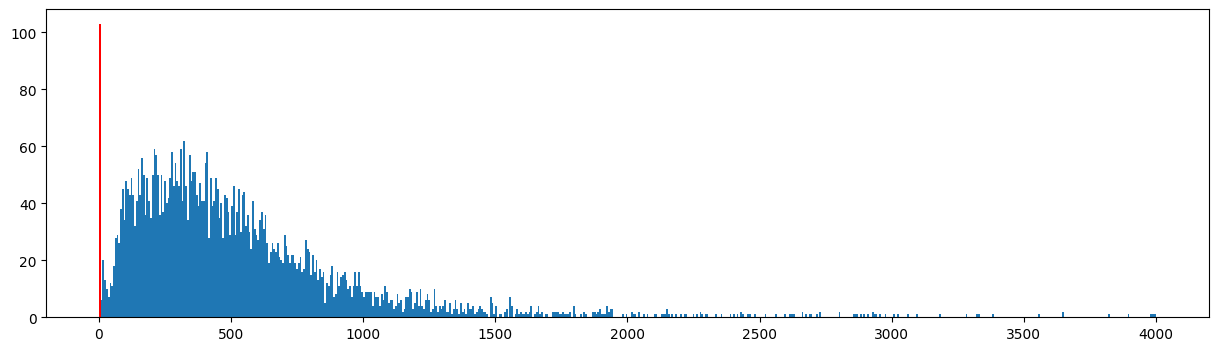

In [30]:
#after filtering by Recenzent, let's go through the data again
hist_first_bar_different_color(tematy_i_opisy['Temat Pracy'].str.len(), bins=600, color='red')

In [31]:
opis_lenght_to_count = {}
for x in range(0,10):
    opis_lenght_to_count[x] = len(tematy_i_opisy[tematy_i_opisy["Temat Pracy"].str.len()==x])
print(opis_lenght_to_count)

{0: 38, 1: 56, 2: 3, 3: 4, 4: 0, 5: 1, 6: 1, 7: 1, 8: 0, 9: 0}


In [32]:
print_unique_values_of_column_with_lenght_in_range(tematy_i_opisy,'Temat Pracy',38,120)

['Studia przypadku wybranych organizacji'
 'Studium przypadku, projekt lub badania'
 'Test how language selection is working']
['Praca dotyczy zastosowania narzędzi LM.'
 'Zrobotyzowane stanowisko do paletyzacji'
 'Praca indywidualna z nowym urządzeniem.']
['Praca dotyczy wykorzystania narzędzi LM.']
['Nawigacja i sterowanie mobilnymi robotami'
 'Temat dotyczący pomocy publicznej dla MSP']
['Praca ma charakter analityczno-projektowy.'
 'Praca indywidualna z wykorzystaniem robota']
['ocena efektywności pracy linii produkcyjnej'
 'Innowacje w procesie rekrutacji pracowników']
['Opis metod projektowania oraz ich porównania'
 'Praca dotyczy analizy procesu produkcyjnego.']
[]
['Innowacje technologiczne w branży logistycznej'
 'wybrane zagadnienia dotyczące działalności NGO']
[]
['Funkcjonalności współczesnych systemów klasy ERP'
 'Zarządzanie ryzykiem w projekcie informatycznym.']
['Opis tego zagadnienia można znaleźć w interniecie']
['Wykorzystanie języka VBA w oprogramowaniu typu CAD'
 '

Krótsze tematy prac wyglądają już sensownie, zerknijmy jeszcze na dłuższe na wszelki wypadek

In [33]:
# print_unique_values_of_column_with_lenght_in_range(tematy_i_opisy,'Temat Pracy',1000,4000)
unq = tematy_i_opisy[tematy_i_opisy['Temat Pracy'].str.len() > 1000]['Temat Pracy']

In [34]:
for x in unq:
    print(x)
    print("---")

Tematem niniejszej pracy jest rozwój funkcjonalności oraz konstrukcji maszyny realizującej proces beznarzędziowego ciągnienia.
Przebudowanie systemu transportu układu grzewczego umożliwi zminimalizowanie zakłóceń procesu beznarzędziowego ciągnienia takich jak drgania systemu, które wynikają z zastosowania niskobudżetowego napędu liniowego. Efektem tych działań będzie otrzymanie próbek oraz danych z procesu beznarzędziowego ciągnienia o wyższej jakości.
Adaptacja kodu aplikacji do pracy na komputerze stacjonarnym zwiększy częstotliwości odczytu wartości z czujnika siły, wykonywania zdjęć próbki oraz podniesie wydajność algorytmu analizującego obraz i wyliczającego wartość odkształcenia próbki. Wynikiem zwiększenia wydajności tych operacji jest uzyskanie dokładniejszych wykresów naprężenia od odkształcenia oraz siły od wydłużenia próbki. Ponadto umożliwi to wykonywanie statycznych prób rozciągania przy większych prędkościach odkształcenia próbki.
Zamontowanie enkodera absolutnego na wale

W dłuższych tematach ilość znaków jest czasami nabijana przez Referencje (literaturę) oraz linki. Czasami zdaża się że tematem jest spis treści pracy dyplomowej, albo zbiór wzorów matematycznych

Zanim jednak usuniemy te rzeczy, warto zobaczyć w któtszych tematach czy nie ma jakiegoś problemu (będzie mniej danych do przejrzenia na raz po tym jak skrócimy dłuższe)

In [35]:
unq = get_unique_values_of_column_with_lenght_in_range(tematy_i_opisy,'Temat Pracy',200,400)
for arr in unq:
    for x in arr:
        print(x)
        print("---")

Celem pracy jest przeprowadzenie audytu efektywności funkcjonowania wybranych aspektów działalności przedsiębiorstwa Mota-Engil, wraz z określeniem propozycji zmian w ujęciu poprawy tejże efektywności
---
Praca będzie obejmować skatalogowanie kilku rodzajów włosów i sierści zwierząt technikami mikroskopowymi, oraz próbę ich analizy technikami proteomicznymi - celem opracowania metody ich identyfikacji.
---
Praca polega na zastosowaniu technologii skanera, druku 3D w celu odwzorowania detalu i wykonania modelu z wykorzystaniem technologii przyrostowych, który może zostać wykorzystany do wykonania odlewu.
---
Koncepcja zarządzania łańcuchami dostaw związana jest z wykorzystaniem informatycznych systemów, co wpływa na efektywność gospodarowania będących w dyspozycji firm ( i całego łańcucha dostaw) zasobów.
---
Celem pracy jest analiza i dobór źródeł energii dla budynku, który spełnia wymagania budownictwa energooszczędnego. W pracy analizowane będą różne warianty z wykorzystaniem odnawia

Pojawia nam się jeszcze słowo `promotor`, ale usunięcie zdania z nim związanego nie zawsze byłoby poprawne (byłyby false-positives). Możemy za to usunąć zdania z `inż.`. Nie możemy natomiast usuwać po `dr.`, dlatego że po `dr` nie daje się kropki, a usunięcie zdań z `dr` ma już dużo false-positives, na przykład w przypadku `DRuku 3d`

Natomiast ogólnie jest nieźle

Następne kroki:
- usunąć zdania ze słowem `inż.`
- wyciągnąć wszystkie URL'e i podmienić na tokeny np. `URL_WIKIPEDIA`, `URL_GITHUB`, `URL_INNE`
- spróbować usunąć referencje do papierów naukowych. Wydaje się że papierem naukowym jest linijka, która:
  - zaczyna się od `[<number>]`
  - zawiera co najmniej dwa wystąpienia kropki poprzedzonej dużą literą __oraz__ zawiera co najmniej jedną ponad 4 cyfrową liczbę __oraz__ conajmniej 1 parę nawiasów okrągłych
  (to wywali przynajmniej większość)

#### Usunąć zdania ze słowem `inż.`

In [36]:
# remove all sentences with "inż." in them
def tytulPracyEngineerFilter(text):
   return getTextWithSentenceSubtracted(text,"inż.",abbrvs=abbvs).strip().replace(".."," ")
tematy_i_opisy['Temat Pracy']=tematy_i_opisy['Temat Pracy'].apply(tytulPracyEngineerFilter)

#### Poprawić URL'e

In [37]:
# get all urls from all topics
import re
urls=[]
for temat in tematy_i_opisy['Temat Pracy']:
    urls.extend(re.findall(r'(https?://\S+)', temat))
len(urls)

235

In [38]:
print(urls)

['https://home.agh.edu.pl/~ligeza/wiki/doku.php).', 'https://home.agh.edu.pl/~ligeza/', 'https://en.wikipedia.org/wiki/Grammatical_evolution', 'https://en.wikipedia.org/wiki/Symbolic_regression', 'https://www.mdpi.com/2076-3417/14/13/5950)', 'https://ai.ia.agh.edu.pl/_media/en:dydaktyka:krr:selected_tools_for_grammatical_evolution_analysis_and_applications.pdf', 'https://en.wikipedia.org/wiki/Grammatical_evolution', 'https://en.wikipedia.org/wiki/Symbolic_regression', 'https://www.mdpi.com/2076-3417/14/13/5950)', 'https://ai.ia.agh.edu.pl/_media/en:dydaktyka:krr:selected_tools_for_grammatical_evolution_analysis_and_applications.pdf', 'https://www.researchgate.net/publication/379652400_A_Survey_on_Explainable_Artificial_Intelligence_Techniques_XAI-based_Model_Improvement_Methods_Applications', 'https://www.mdpi.com/2076-3417/14/13/5950)', 'https://ai.ia.agh.edu.pl/_media/en:dydaktyka:krr:selected_tools_for_grammatical_evolution_analysis_and_applications.pdf', 'https://credo.science/', '

In [39]:
#grup them by domain
domain2Urls = {}
for url in urls:
    domain = url.split("/")[2]
    if domain not in domain2Urls:
        domain2Urls[domain] = []
    domain2Urls[domain].append(url)

In [40]:
#print all keys
for key in domain2Urls.keys():
    print(key)

home.agh.edu.pl
en.wikipedia.org
www.mdpi.com
ai.ia.agh.edu.pl
www.researchgate.net
credo.science
medium.com
arxiv.org
ieeexplore.ieee.org
www.antlr.org
colab.research.google.com
doi.org
www.ijcai.org
open-meteo.com)
www.kaggle.com
captain-whu.github.io
openstartracker.org.
www.reddit.com
dose3d.fis.agh.edu.pl
annals-csis.org
towardsdatascience.com
papers.ssrn.com
portal.strategie.net.pl
github.com
uav.pansa.pl
www.paraview.org
www.sciencedirect.com
t.ly
keras.io
www.rdkit.org
onlinelibrary.wiley.com
www.visualthesaurus.com
pypi.org
www.rosroboticslearning.com
wiki.ros.org
docs.omniverse.nvidia.com
gazebosim.org
link.springer.com
docs.ocean.dwavesys.com
journalofcloudcomputing.springeropen.com
www.siam.org
www.ion.org
winntbg.bg.agh.edu.pl
carla.org
galaxy.uci.agh.edu.pl
www.eclipse.org
www.diva-portal.org
hal.inria.fr
csrc.nist.gov
www.prismmodelchecker.org
uppaal.org
lensstudio.snapchat.com
youtu.be
ar.snap.com
www.oden.utexas.edu
epodreczniki.open.agh.edu.pl
www.timeseriesclassifica

In [41]:
def classifyURL(url):
    if "youtu.be" in url or "youtube.com" in url:
        return "YouTube"
    if "wiki" in url:
        return "Wikipedia"
    if "github.com" in url or "gitlab.com" in url:
        return "Git"
    if "drive.google.com" in url or "dropbox" in url or "mega.nz" in url:
        return "CloudStorage"
    return "Other"

In [42]:
def tytulPracyURLMasker(text):
    for url in re.findall(r'(https?://\S+)', text):
        text = text.replace(url, "URL_"+classifyURL(url).upper())
    return text

In [43]:
#get row that has "The main focus will be on Grammatical Evolution" in the Temat Pracy
print(tematy_i_opisy[tematy_i_opisy['Temat Pracy'].str.contains("The main focus will be on Grammatical Evolution")]['Temat Pracy'].sample(1).values[0])

The aim of the thesis is to analyze selected methods and tools for semantic-level Machine Learning (ML). The main focus will be on Grammatical Evolution (GE) and its applications to discovery of interpretable functional dependencies in data repositories. The research is oriented towards building models of eXplainable Artificial Intelligence (XAI). Grammatical Evolution is a method of learning/generating/discovering a function satisfying certain input-output specification. More on GE can be found at:
https://en.wikipedia.org/wiki/Grammatical_evolution
and
https://en.wikipedia.org/wiki/Symbolic_regression
Some alternative approaches may include causal analysis, rules discovery, building logical models, etc. The common denominator is that the learned model should be transparent , perhaps composed of some smaller parts, and interpretable in view of existing background knowledge.
The thesis should present some short analysis of selected tools of semantic ML and critical evaluation of numeri

In [44]:
tematy_i_opisy['Temat Pracy']=tematy_i_opisy['Temat Pracy'].apply(tytulPracyURLMasker)

In [45]:
#get row that has "The main focus will be on Grammatical Evolution" in the Temat Pracy
print(tematy_i_opisy[tematy_i_opisy['Temat Pracy'].str.contains("The main focus will be on Grammatical Evolution")]['Temat Pracy'].sample(1).values[0])

The aim of the thesis is to analyze selected methods and tools for semantic-level Machine Learning (ML). The main focus will be on Grammatical Evolution (GE) and its applications to discovery of interpretable functional dependencies in data repositories. The research is oriented towards building models of eXplainable Artificial Intelligence (XAI). Grammatical Evolution is a method of learning/generating/discovering a function satisfying certain input-output specification. More on GE can be found at:
URL_WIKIPEDIA
and
URL_WIKIPEDIA
Some alternative approaches may include causal analysis, rules discovery, building logical models, etc. The common denominator is that the learned model should be transparent , perhaps composed of some smaller parts, and interpretable in view of existing background knowledge.
The thesis should present some short analysis of selected tools of semantic ML and critical evaluation of numerical experiments. The main focus should be on selecting interesting, smart 

#### Usunąć referencje

In [46]:
# "Literatura", "References:"
#get row that has "The main focus will be on Grammatical Evolution" in the Temat Pracy
for x in tematy_i_opisy[tematy_i_opisy['Temat Pracy'].str.contains("Literatura")]['Temat Pracy']:
    print(x)
    print("---")

for x in tematy_i_opisy[tematy_i_opisy['Temat Pracy'].str.contains("References:")]['Temat Pracy']:
    print(x)
    print("---")

Mechanizm leku uwarunkowego nabytego na podstawioe jednego silnego traumatycznego przeżycia pozwala unikać sytuacji niebezpiecznych na podstawie pojedynczego doświadczenia takiej sytuacji. Można na ten mechanizm spojrzeć jako na specyficzny sposób nauki polegający na skojarzeniu strumienia bodźców zarejestrowanych w trakcie traumatycznego doświadczenia z tym doświadczeniem. Skutkuje to silną reakcją lękową przy powtórnym doświadczeniu analogicznego strumienia bodźców i, w konsekwencji, unikania podobnych sytuacji. Ten mechanizm może być zaimplementowany w robocie autonomicznym działającym w środowisku zagrażającym, co pozwala robotowi zwiększyc szanse ekzystencji w środowisku.
Literatura:
Bielecki A., Bielecka M., Bielecki P.,
"Conditioned anxiety mechanism as a basis for a procedure of control module of an autonomous robot",
Lecture Notes in Artificial Intelligence, vol.10246, 390-398.
---
System ma przeprowadzać pomiar za pomocą elastycznych czujników pojemnościowych umieszczonych na

Exploitujemy właściwość że referencje daje się zawsze na dole

In [47]:
# #remove all text from Temat Pracy that is after "[1]"
# def tytulPracyReferencesFilter_OneInBrackets(text):
#     inxex_of_one_in_brackets = text.find("[1]")
#     if inxex_of_one_in_brackets == -1:
#         return text
#     return text[:inxex_of_one_in_brackets]

literatureKeywords=["Literatura","Literature","References"]
                    # "Bibliografia","Bibliography"] intentionally left out

#get all Tematy Pracy that contain any of the literatureKeywords
# Use str.contains with '|'.join to check if any keyword is present in the 'Temat Pracy' column
literatureKeywordsMask = tematy_i_opisy['Temat Pracy'].str.contains('|'.join(literatureKeywords), case=True)
# Iterate over all 'Temat Pracy' that match the condition
for x in tematy_i_opisy[literatureKeywordsMask]['Temat Pracy']:
    print(x)  # Or perform any other action
    print("---")

Mechanizm leku uwarunkowego nabytego na podstawioe jednego silnego traumatycznego przeżycia pozwala unikać sytuacji niebezpiecznych na podstawie pojedynczego doświadczenia takiej sytuacji. Można na ten mechanizm spojrzeć jako na specyficzny sposób nauki polegający na skojarzeniu strumienia bodźców zarejestrowanych w trakcie traumatycznego doświadczenia z tym doświadczeniem. Skutkuje to silną reakcją lękową przy powtórnym doświadczeniu analogicznego strumienia bodźców i, w konsekwencji, unikania podobnych sytuacji. Ten mechanizm może być zaimplementowany w robocie autonomicznym działającym w środowisku zagrażającym, co pozwala robotowi zwiększyc szanse ekzystencji w środowisku.
Literatura:
Bielecki A., Bielecka M., Bielecki P.,
"Conditioned anxiety mechanism as a basis for a procedure of control module of an autonomous robot",
Lecture Notes in Artificial Intelligence, vol.10246, 390-398.
---
In addition to proton-proton collisions, the ATLAS experiment at the Large Hadron Collider also 

In [48]:
# iterate and remove all text after the first occurence of any of the literatureKeywords. Print what has been removed
for x in tematy_i_opisy[literatureKeywordsMask]['Temat Pracy']:
    literatureKeywordIndex = -1
    for keyword in literatureKeywords:
        if keyword in x:
            literatureKeywordIndex = x.find(keyword)
            break
    if literatureKeywordIndex == -1:
        print("No keyword found in: "+x)
    else:
        print(x[literatureKeywordIndex:]+"\n---")

Literatura:
Bielecki A., Bielecka M., Bielecki P.,
"Conditioned anxiety mechanism as a basis for a procedure of control module of an autonomous robot",
Lecture Notes in Artificial Intelligence, vol.10246, 390-398.
---
References:
[1] Nature Phys. 13 (2017) 852
[2] Phys. Rev. Lett. 123 (2019) 052001
[3] JHEP 03 (2021) 243
---
References:
[1] Nature Phys. 13 (2017) 852
[2] Phys. Rev. Lett. 123 (2019) 052001
[3] JHEP 03 (2021) 243
[4] Phys.Rev.D 106 (2022) 11
---
Literatura tematu:
[1] Glauser O., Panozzo D., Hilliges O., Sorkine-Hornung O. 2019. Deformation Capture via Soft and Stretchable Sensor Arrays. ACM Trans. Graph. 38, 2, Article 16 (April 2019), 16 pages. URL_OTHER
[2] Glauser, O., Wu, S., Panozzo, D., Hilliges, O., & Sorkine-Hornung, O. (2019). Interactive hand pose estimation using a stretch-sensing soft glove. ACM Trans. Graph. 38, 4, Article 41 (August 2019), 15 pages. URL_OTHER
---
Literatura tematu:
1. GUO, D. X., et al. Noninvasive blood glucose measurement based on NIR sp

In [49]:
def tytulPracyReferencesFilter(text):
    index_of_literature_keyword = -1
    for keyword in literatureKeywords:
        if keyword in text:
            index_of_literature_keyword = text.find(keyword)
            break
    if index_of_literature_keyword == -1:
        return text
    return text[:index_of_literature_keyword]

In [50]:
tematy_i_opisy['Temat Pracy']=tematy_i_opisy['Temat Pracy'].apply(tytulPracyReferencesFilter)

In [51]:
#- spróbować usunąć referencje do papierów naukowych. Wydaje się że papierem naukowym jest linijka, która:
#   - zaczyna się od `[<number>]`
#   - zawiera co najmniej dwa wystąpienia kropki poprzedzonej dużą literą __oraz__ zawiera co najmniej jedną ponad 4 cyfrową liczbę __oraz__ conajmniej 1 parę nawiasów okrągłych
#   (to wywali przynajmniej większość)
# def removeAcademicPapers(text):
    # return re.sub(r'\[\d+\].*?\d{4,}.*?\(.*?\).*?\..*?\..*?\.', "ACADEMIC_PAPER", text)

## Last summary of this dataset

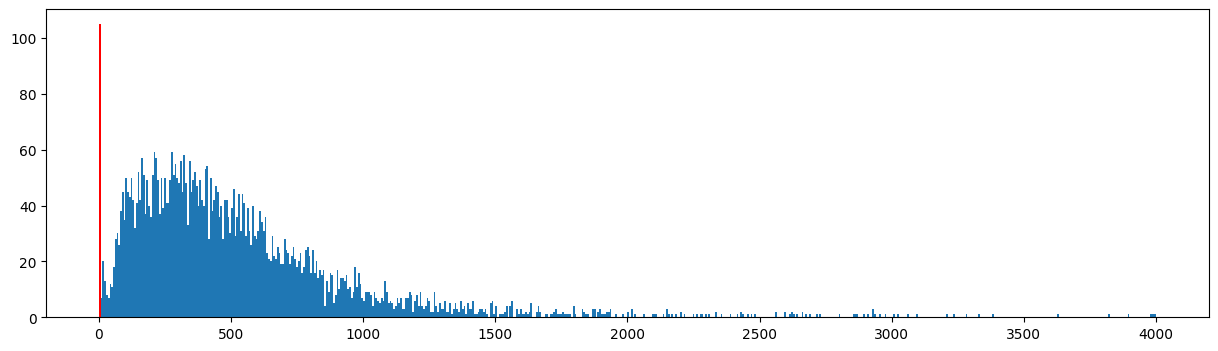

In [52]:
#after filtering by Recenzent, let's go through the data again
hist_first_bar_different_color(tematy_i_opisy['Temat Pracy'].str.len(), bins=600, color='red')